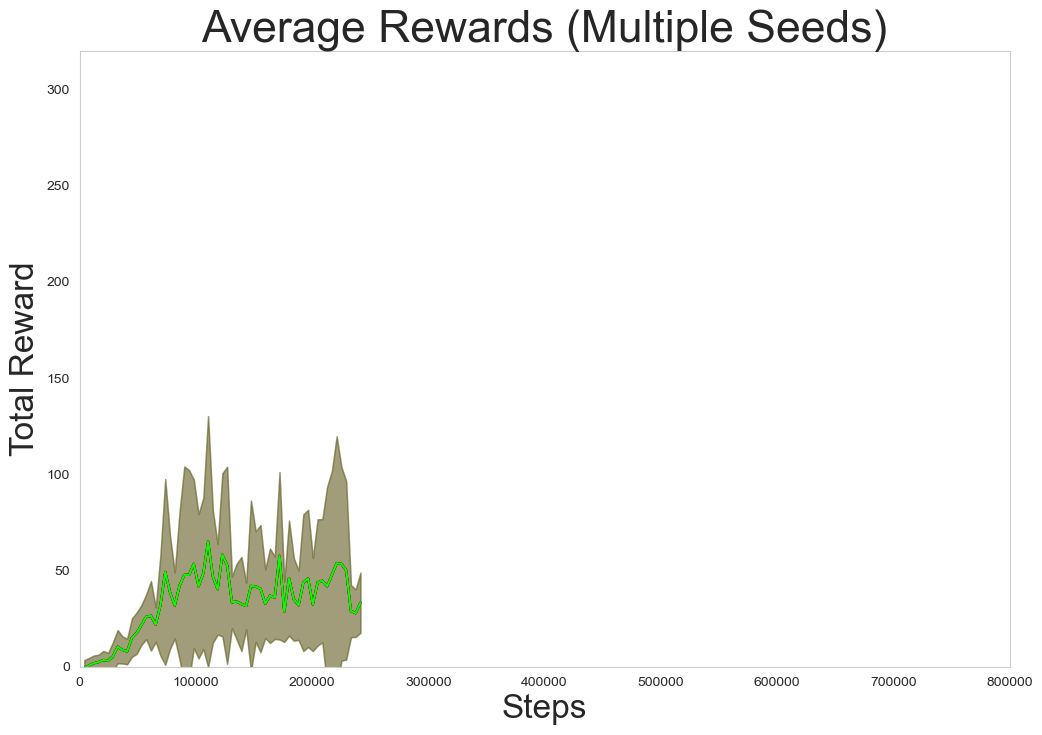

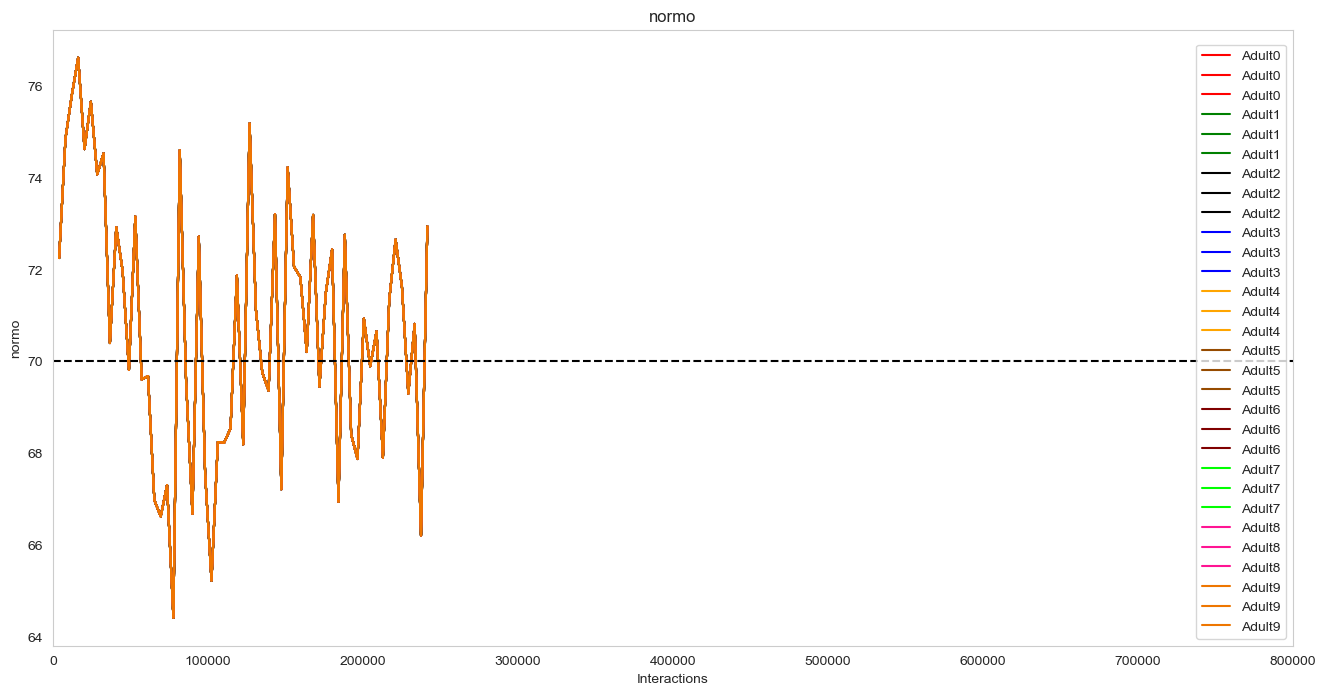

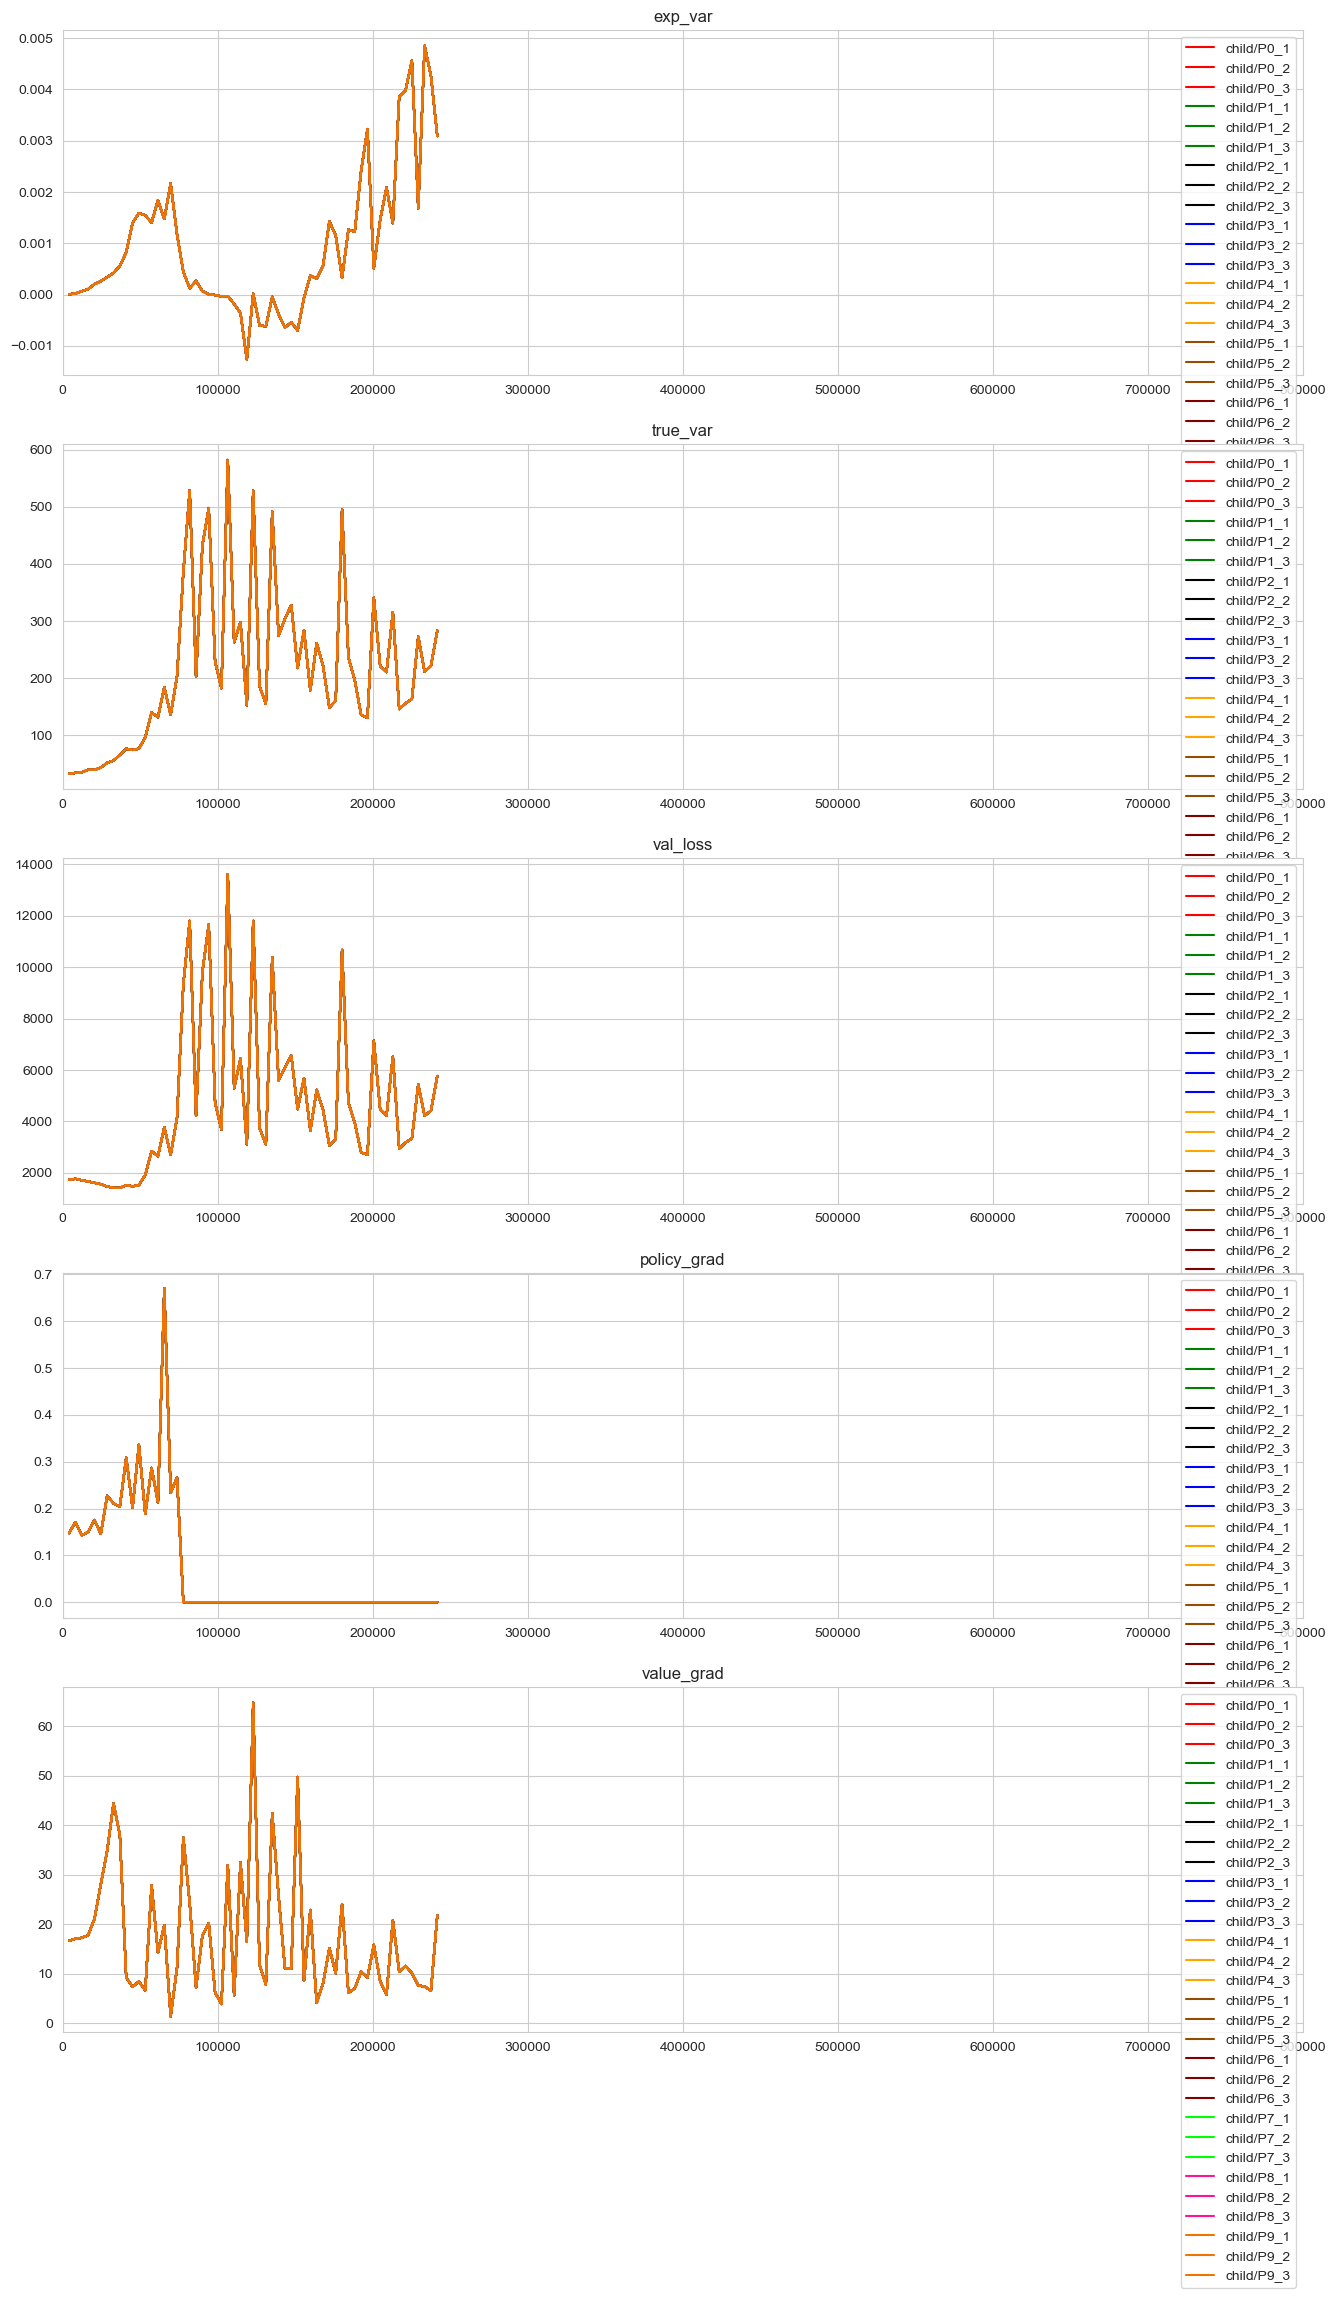

FileNotFoundError: [Errno 2] No such file or directory: '/Users/adema/VSProjects/RL/G2P2C/results/test//planning_model_log.csv'

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd


# from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH='/Users/adema/VSProjects/RL/G2P2C'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs, plot_episode_dynamic
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 


#FOLDER = 'May29/'
# FOLDER = '/nci/May12/adult_easy/'
# ALGO = 'P'
# PATH = FOLDER+ALGO
# COHORT = 'Adult'


FOLDER = 'child/' #adult_transformer
ALGO = 'P'
PATH = FOLDER+ALGO
COHORT = 'Adult'
    
# initialise experiment objects
lime, brown, orange, pink, gray, darkorange2 = '#00FF00', '#964B00', '#FFA500', '#FF1493', '#808080', '#EE7600'
darkslateblue, maroon, navyblue = '#483D8B', '#800000', '#000080'
darkgreen =  '#006400'

exp1 = ExperimentVisualise(id=PATH+'0_1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'0_2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'0_3', version=1.1, plot_version=1, test_seeds=5000)

exp4 = ExperimentVisualise(id=PATH+'1_1', version=1.1, plot_version=1, test_seeds=5000)
exp5 = ExperimentVisualise(id=PATH+'1_2', version=1.1, plot_version=1, test_seeds=5000)
exp6 = ExperimentVisualise(id=PATH+'1_3', version=1.1, plot_version=1, test_seeds=5000)

exp7 = ExperimentVisualise(id=PATH+'2_1', version=1.1, plot_version=1, test_seeds=5000)
exp8 = ExperimentVisualise(id=PATH+'2_2', version=1.1, plot_version=1, test_seeds=5000)
exp9 = ExperimentVisualise(id=PATH+'2_3', version=1.1, plot_version=1, test_seeds=5000)

exp10 = ExperimentVisualise(id=PATH+'3_1', version=1.1, plot_version=1, test_seeds=5000)
exp11 = ExperimentVisualise(id=PATH+'3_2', version=1.1, plot_version=1, test_seeds=5000)
exp12 = ExperimentVisualise(id=PATH+'3_3', version=1.1, plot_version=1, test_seeds=5000)

exp13 = ExperimentVisualise(id=PATH+'4_1', version=1.1, plot_version=1, test_seeds=5000)
exp14 = ExperimentVisualise(id=PATH+'4_2', version=1.1, plot_version=1, test_seeds=5000)
exp15 = ExperimentVisualise(id=PATH+'4_3', version=1.1, plot_version=1, test_seeds=5000)

exp16 = ExperimentVisualise(id=PATH+'5_1', version=1.1, plot_version=1, test_seeds=5000)
exp17 = ExperimentVisualise(id=PATH+'5_2', version=1.1, plot_version=1, test_seeds=5000)
exp18 = ExperimentVisualise(id=PATH+'5_3', version=1.1, plot_version=1, test_seeds=5000)

exp19 = ExperimentVisualise(id=PATH+'6_1', version=1.1, plot_version=1, test_seeds=5000)
exp20 = ExperimentVisualise(id=PATH+'6_2', version=1.1, plot_version=1, test_seeds=5000)
exp21 = ExperimentVisualise(id=PATH+'6_3', version=1.1, plot_version=1, test_seeds=5000)

exp22 = ExperimentVisualise(id=PATH+'7_1', version=1.1, plot_version=1, test_seeds=5000)
exp23 = ExperimentVisualise(id=PATH+'7_2', version=1.1, plot_version=1, test_seeds=5000)
exp24 = ExperimentVisualise(id=PATH+'7_3', version=1.1, plot_version=1, test_seeds=5000)

exp25 = ExperimentVisualise(id=PATH+'8_1', version=1.1, plot_version=1, test_seeds=5000)
exp26 = ExperimentVisualise(id=PATH+'8_2', version=1.1, plot_version=1, test_seeds=5000)
exp27 = ExperimentVisualise(id=PATH+'8_3', version=1.1, plot_version=1, test_seeds=5000)

exp28 = ExperimentVisualise(id=PATH+'9_1', version=1.1, plot_version=1, test_seeds=5000)
exp29 = ExperimentVisualise(id=PATH+'9_2', version=1.1, plot_version=1, test_seeds=5000)
exp30 = ExperimentVisualise(id=PATH+'9_3', version=1.1, plot_version=1, test_seeds=5000)


# plot the graphs
dis_len = 0.8 * 1000000
command = []
disp_arr = display_commands_v2(command)
exp_vis = {
             '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label": COHORT+'0'}, 
             '2':{ "id":exp2, "color":'r',"show": disp_arr[2], "label": COHORT+'0'},  
             '3':{ "id":exp3, "color":'r',"show": disp_arr[3], "label": COHORT+'0'}, 
             '4':{ "id":exp4, "color":'g',"show": disp_arr[4], "label": COHORT+'1'},  
             '5':{ "id":exp5, "color":'g',"show": disp_arr[5], "label": COHORT+'1'}, 
             '6':{ "id":exp6, "color":'g',"show": disp_arr[6], "label": COHORT+'1'},  
             '7':{ "id":exp7, "color":'k',"show": disp_arr[7], "label": COHORT+'2'}, 
             '8':{ "id":exp8, "color":'k',"show": disp_arr[8], "label": COHORT+'2'},
             '9':{ "id":exp9, "color":'k',"show": disp_arr[9], "label": COHORT+'2'}, 
             '10':{ "id":exp10, "color":'b',"show": disp_arr[10], "label": COHORT+'3'},
             '11':{ "id":exp11, "color":'b',"show": disp_arr[11], "label": COHORT+'3'}, 
             '12':{ "id":exp12, "color":'b',"show": disp_arr[12], "label": COHORT+'3'},
             '13':{ "id":exp13, "color":orange,"show": disp_arr[13], "label": COHORT+'4'},
             '14':{ "id":exp14, "color":orange,"show": disp_arr[14], "label": COHORT+'4'}, 
             '15':{ "id":exp15, "color":orange,"show": disp_arr[15], "label": COHORT+'4'},
             '16':{ "id":exp16, "color":brown,"show": disp_arr[16], "label": COHORT+'5'},
             '17':{ "id":exp17, "color":brown,"show": disp_arr[17], "label": COHORT+'5'}, 
             '18':{ "id":exp18, "color":brown,"show": disp_arr[18], "label": COHORT+'5'},
             '19':{ "id":exp19, "color":maroon,"show": disp_arr[19], "label": COHORT+'6'},
             '20':{ "id":exp20, "color":maroon,"show": disp_arr[20], "label": COHORT+'6'}, 
             '21':{ "id":exp21, "color":maroon,"show": disp_arr[21], "label": COHORT+'6'},
             '22':{ "id":exp22, "color":lime,"show": disp_arr[22], "label": COHORT+'7'},
             '23':{ "id":exp23, "color":lime,"show": disp_arr[23], "label": COHORT+'7'}, 
             '24':{ "id":exp24, "color":lime,"show": disp_arr[24], "label": COHORT+'7'},
             '25':{ "id":exp25, "color":pink,"show": disp_arr[25], "label": COHORT+'8'},
             '26':{ "id":exp26, "color":pink,"show": disp_arr[26], "label": COHORT+'8'}, 
             '27':{ "id":exp27, "color":pink,"show": disp_arr[27], "label": COHORT+'8'},
             '28':{ "id":exp28, "color":darkorange2,"show": disp_arr[28], "label": COHORT+'9'},
             '29':{ "id":exp29, "color":darkorange2,"show": disp_arr[29], "label": COHORT+'9'}, 
             '30':{ "id":exp30, "color":darkorange2,"show": disp_arr[30], "label": COHORT+'9'}
}

groups = [['1', '2', '3'],  ['4', '5', '6'], ['7', '8', '9'],['10', '11', '12'], ['13', '14', '15'],  
          ['16', '17', '18'] , ['19', '20', '21'], ['22', '23', '24']]
#,
plot_testing_average_metric(exp_vis, groups, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)


#plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
# #plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
# plot_training_logs(exp_vis, dis_len, version=3)
params = ['exp_var', 'true_var','val_loss', 'policy_grad', 'value_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
# params = ['plan_grad', 'plan_loss'] 
plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {58: 60}, 't': {58: 66}, 'reward': {58: 47.927277}, 'normo': {58: 93.93939393939394}, 'hypo': {58: 3.0303030303030303}, 'sev_hypo': {58: 3.0303030303030303}, 'hyper': {58: 0.0}, 'lgbi': {58: 4.884449}, 'hgbi': {58: 2.635993}, 'ri': {58: 7.520442}, 'sev_hyper': {58: 0.0}, 'aBGP_rmse': {58: 0}, 'cBGP_rmse': {58: 0}}
{'epi': {58: 60}, 't': {58: 73}, 'reward': {58: 53.799652}, 'normo': {58: 78.08219178082192}, 'hypo': {58: 16.438356164383563}, 'sev_hypo': {58: 5.47945205479452}, 'hyper': {58: 0.0}, 'lgbi': {58: 7.2104874}, 'hgbi': {58: 0.47091004}, 'ri': {58: 7.6813974}, 'sev_hyper': {58: 0.0}, 'aBGP_rmse': {58: 0}, 'cBGP_rmse': {58: 0}}
{'epi': {58: 60}, 't': {58: 76}, 'reward': {58: 56.86492}, 'normo': {58: 77.63157894736842}, 'hypo': {58: 17.105263157894736}, 'sev_hypo': {58: 5.2631578947368425}, 'hyper': {58: 0.0}, 'lgbi': {58: 7.695023}, 'hgbi': {58: 0.6260942}, 'ri': {58: 8.321117}, 'sev_hyper': {58: 0.0}, 'aBGP_rmse': {58: 0}, 'cBGP_rmse': {58: 0}}
{'

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


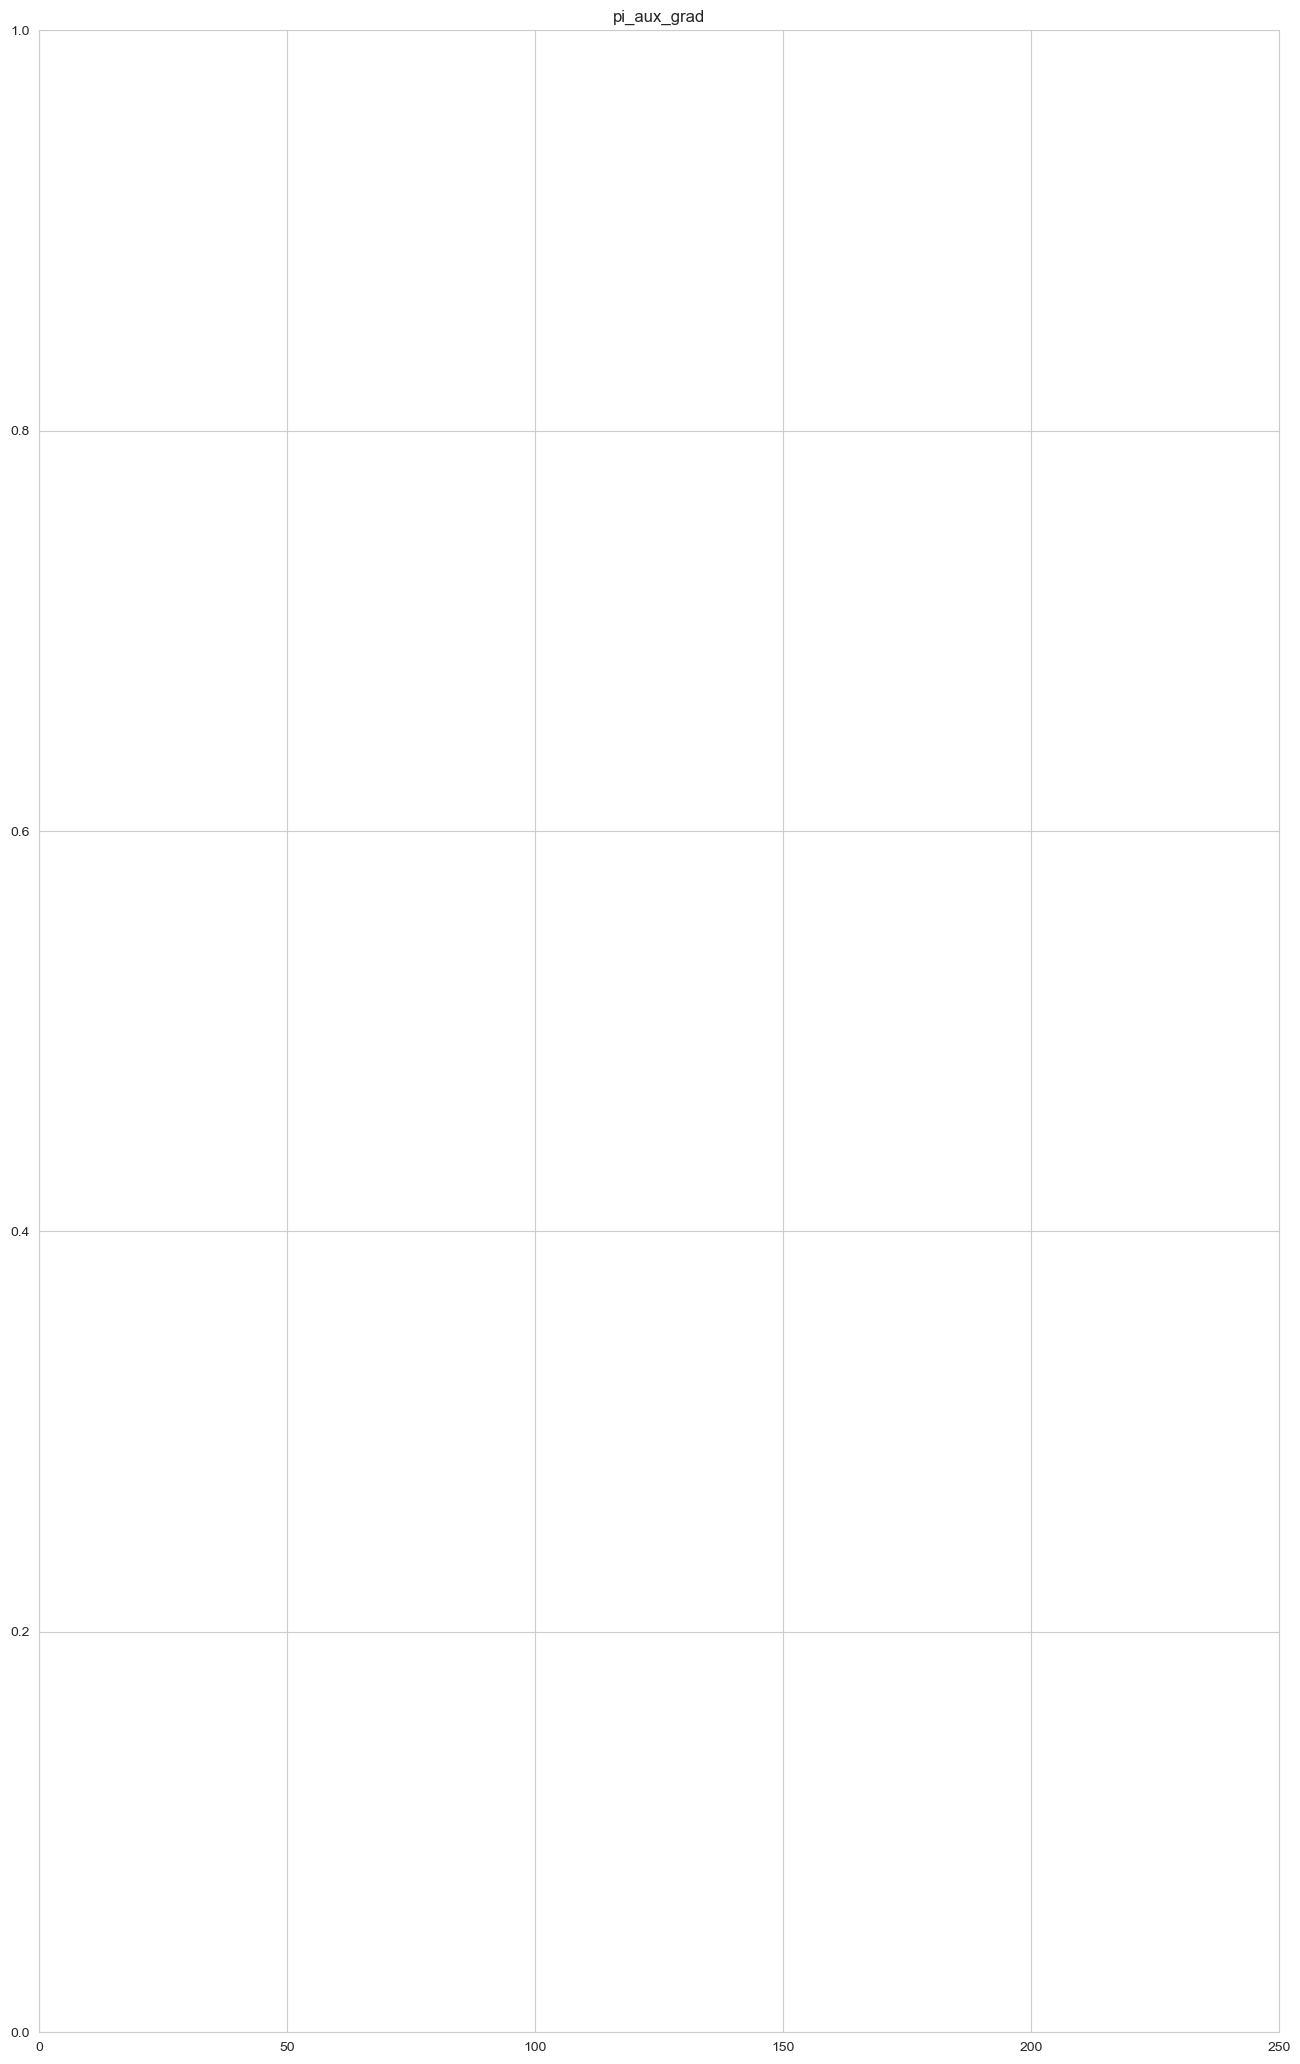

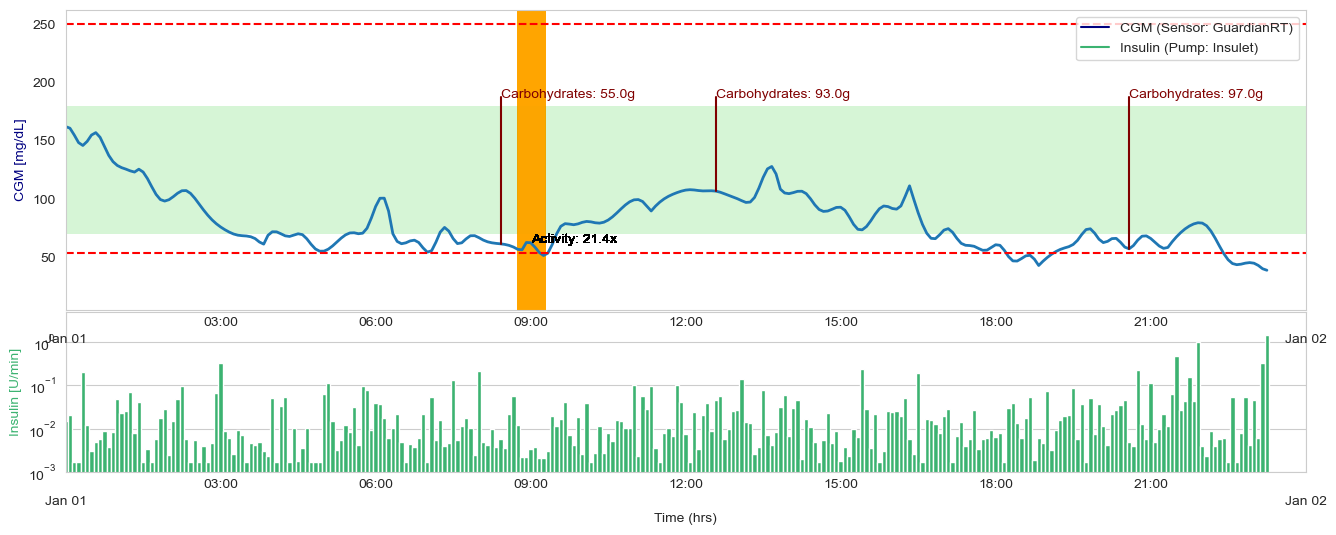

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


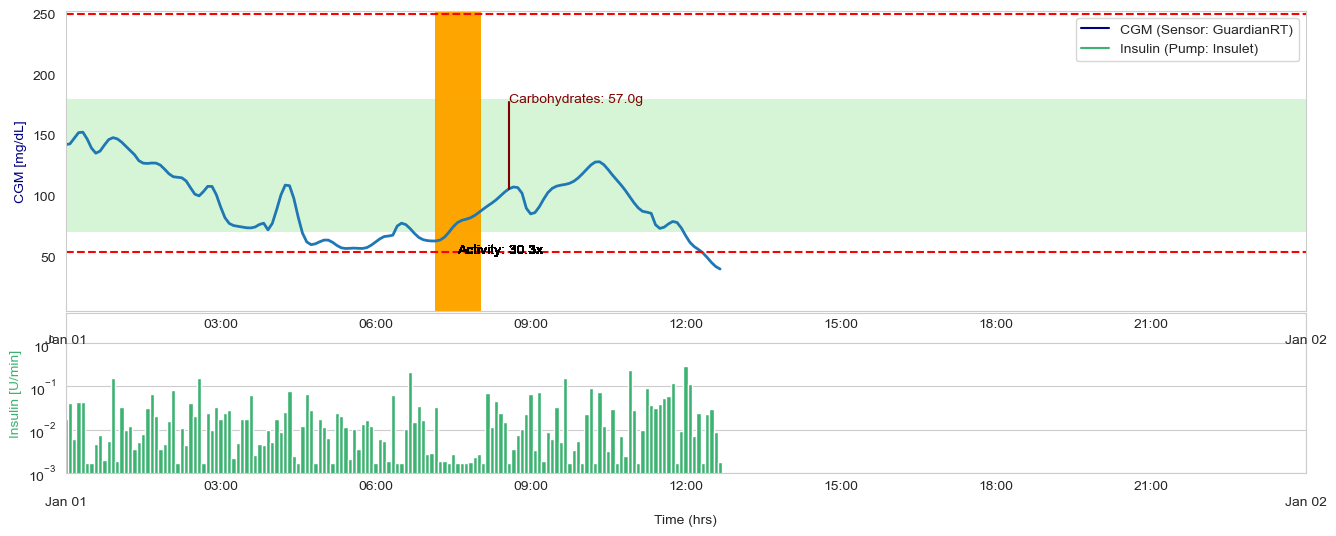

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


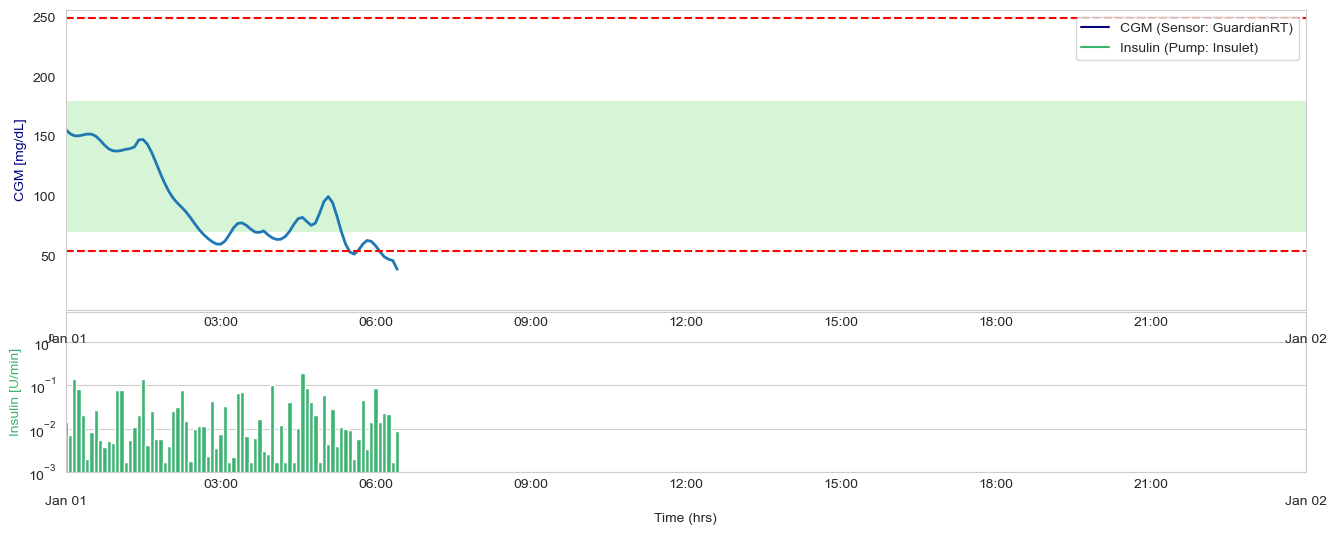

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


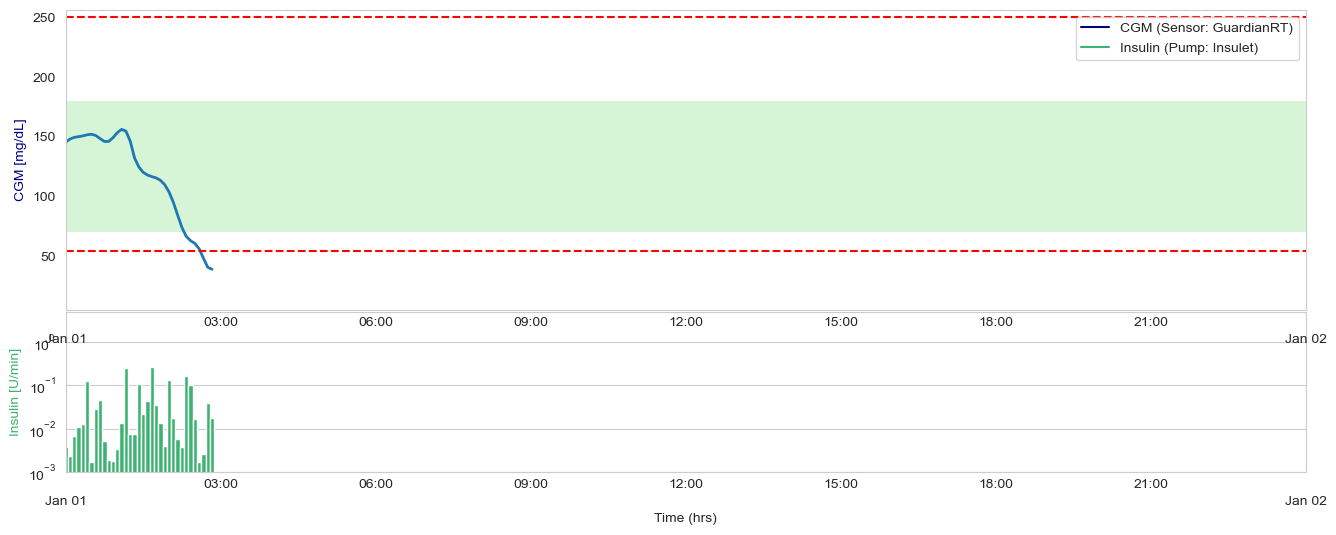

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


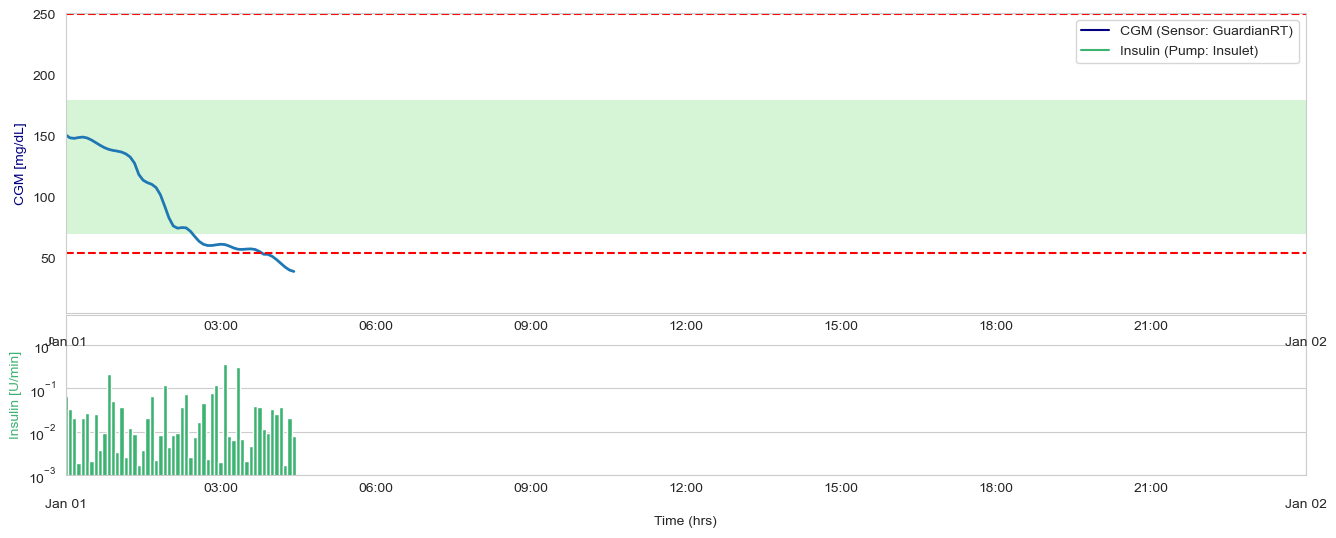

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


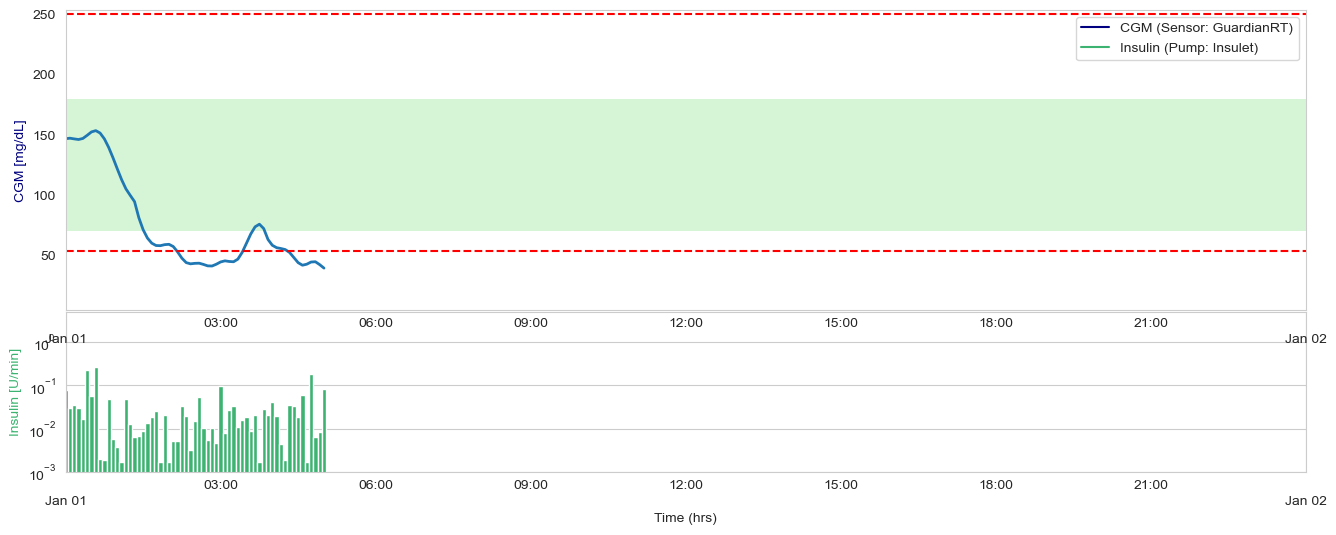

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


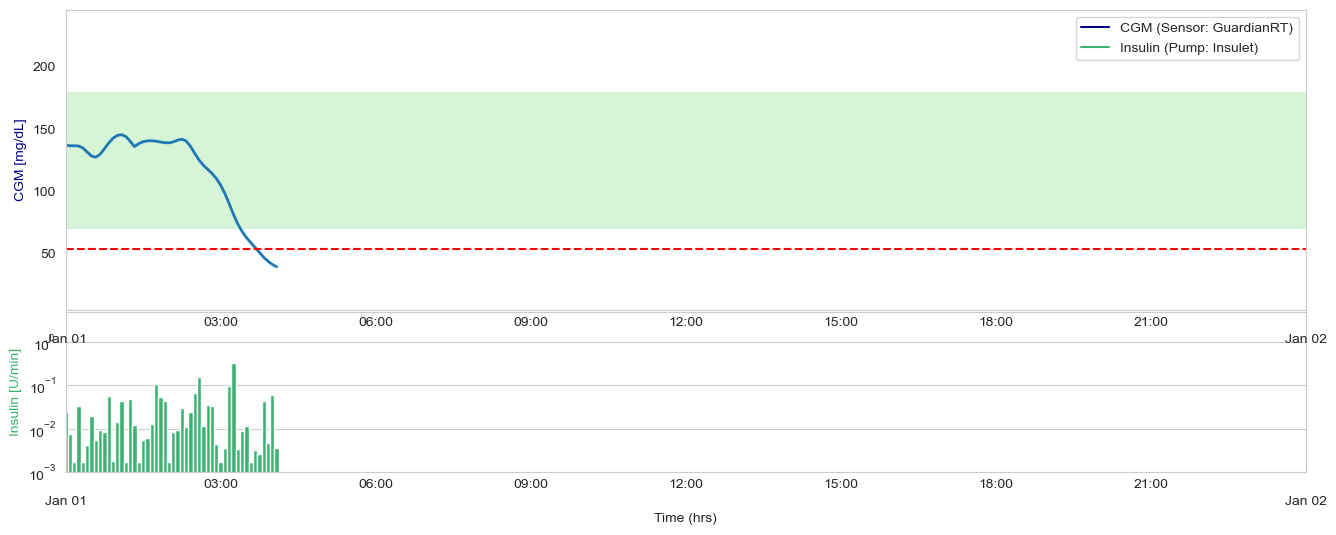

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


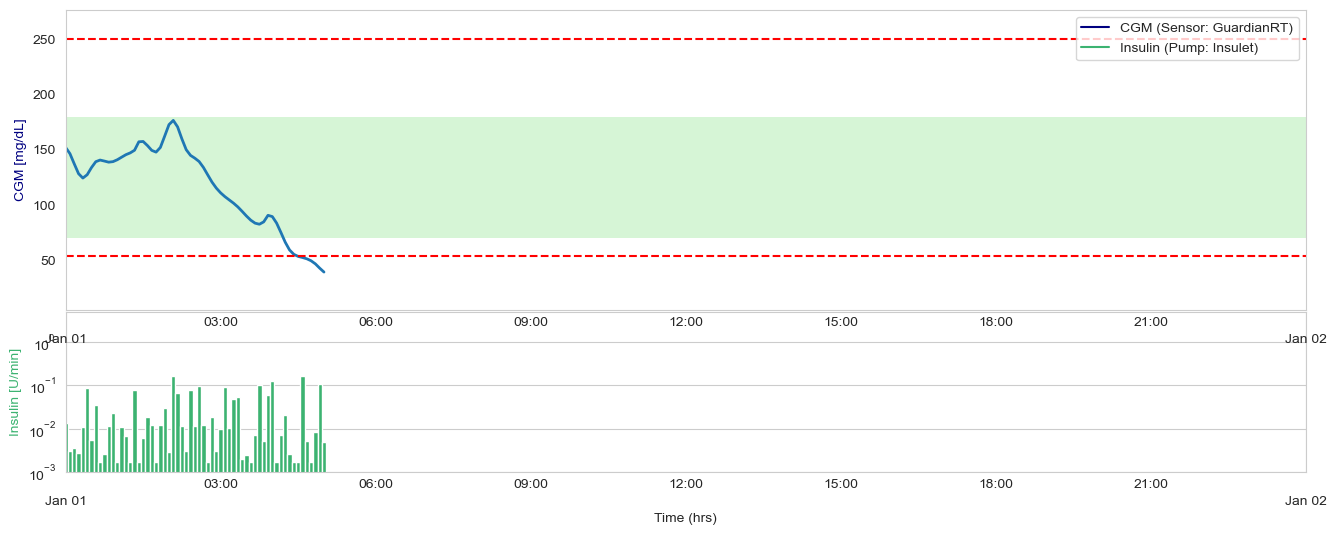

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


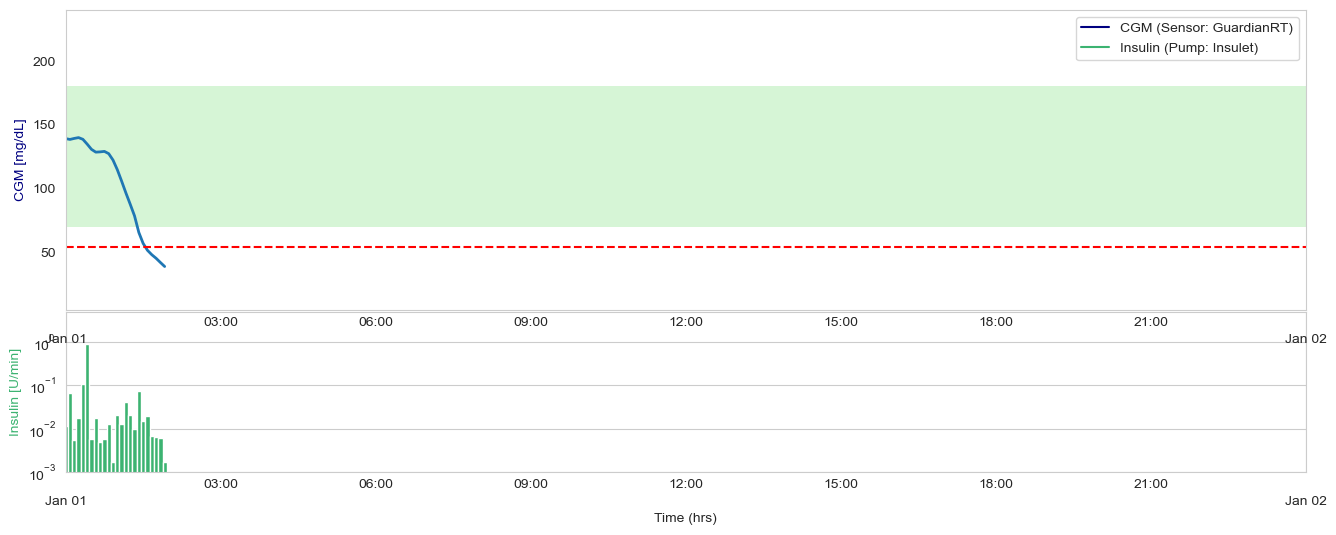

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


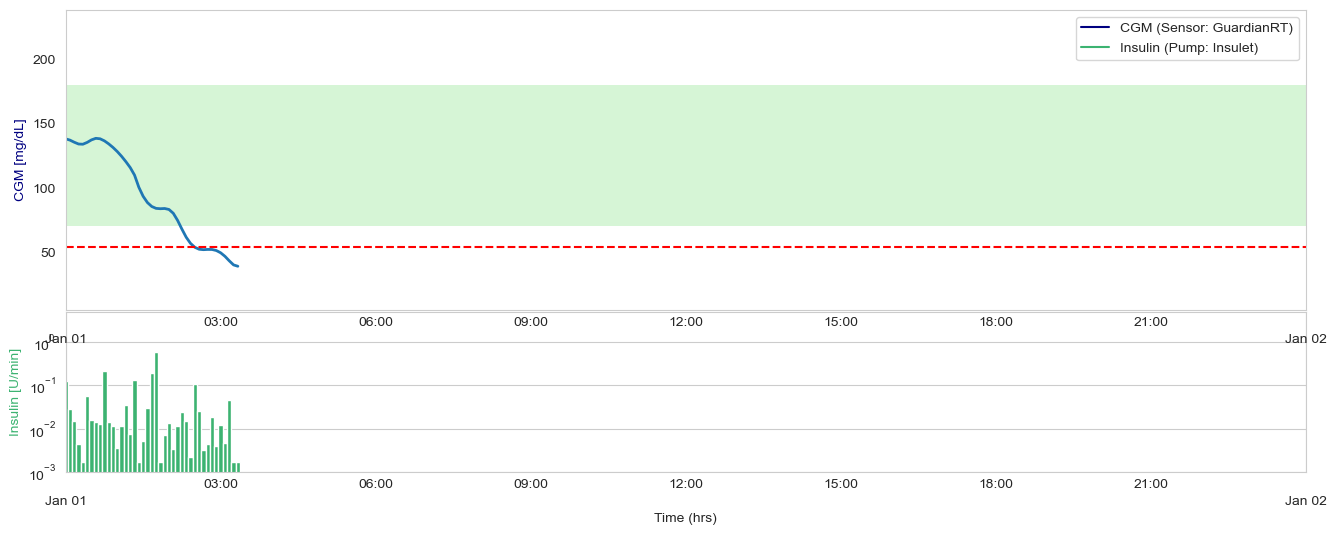

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


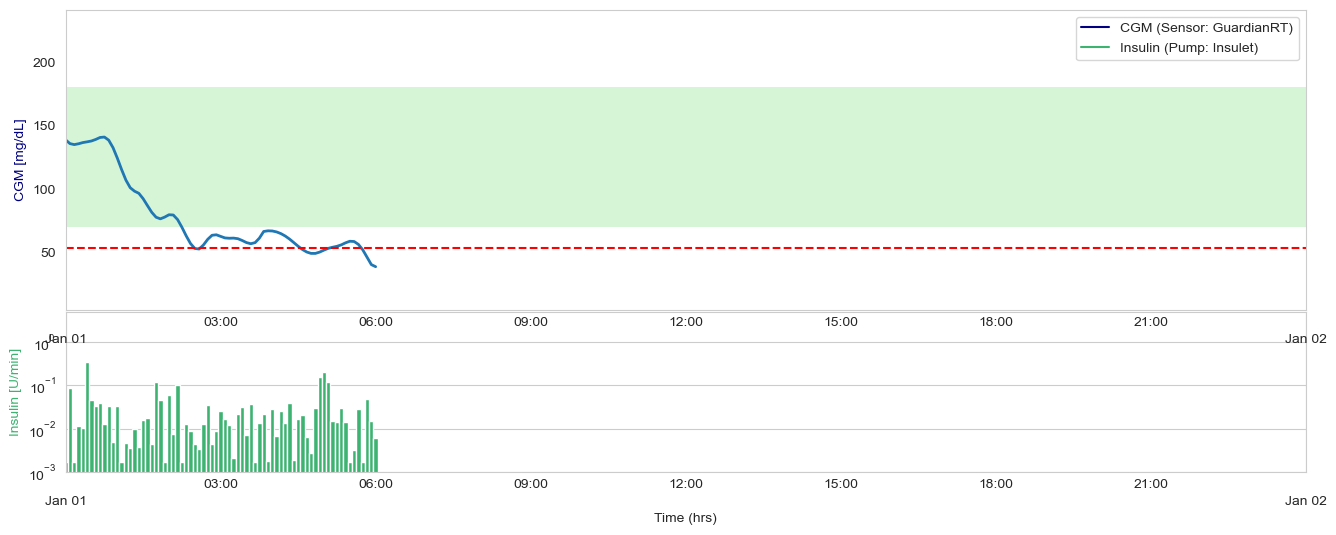

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


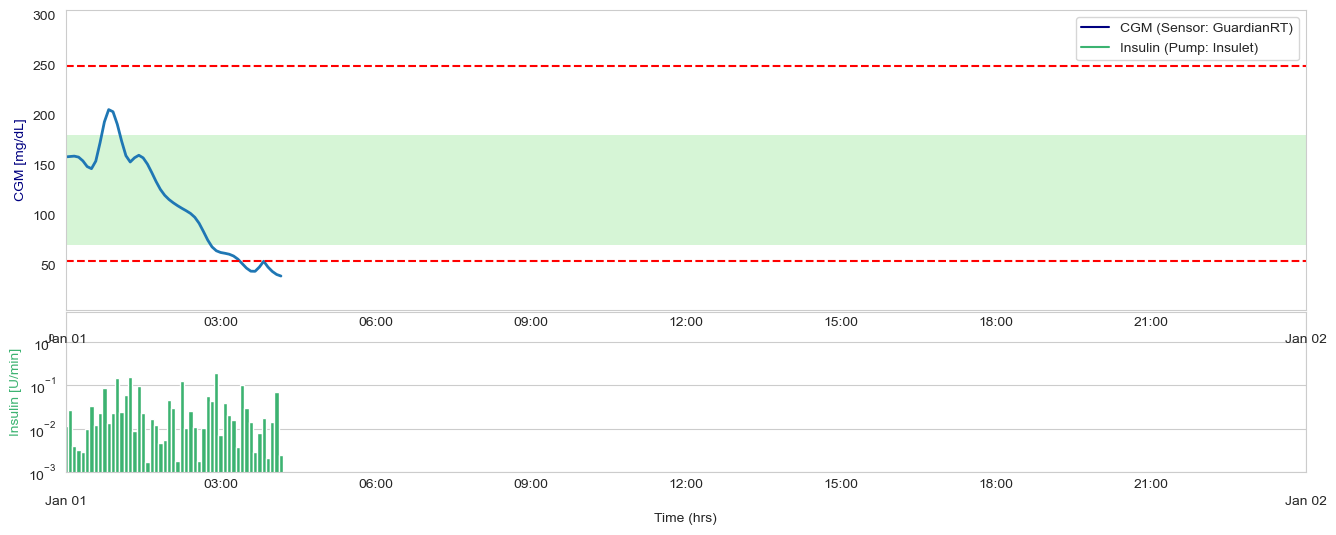

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


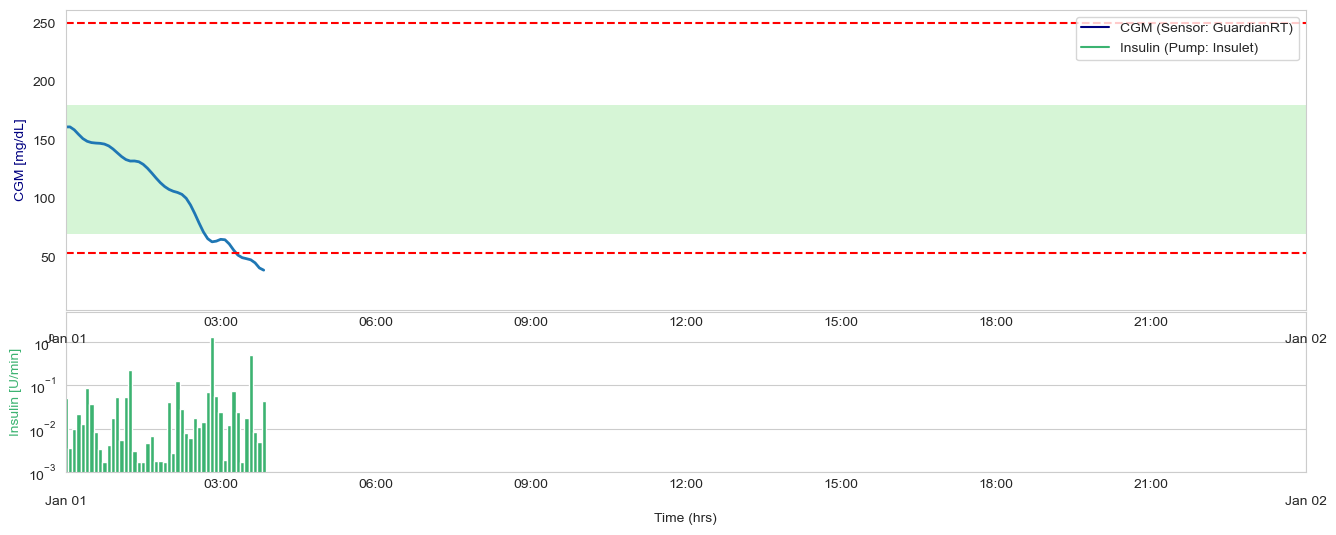

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


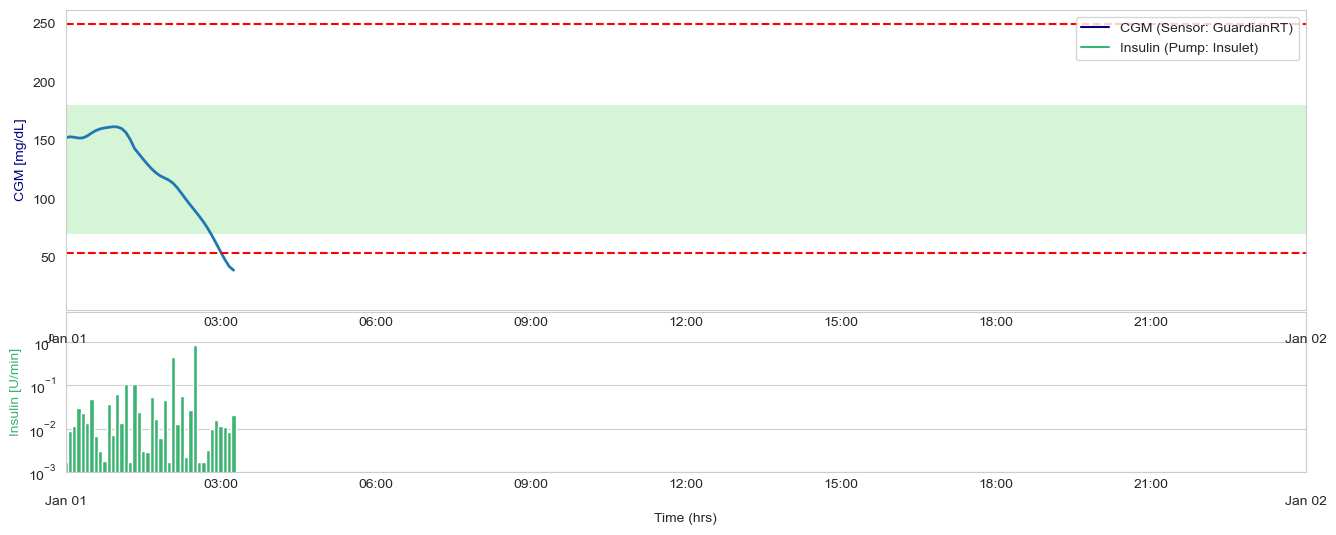

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


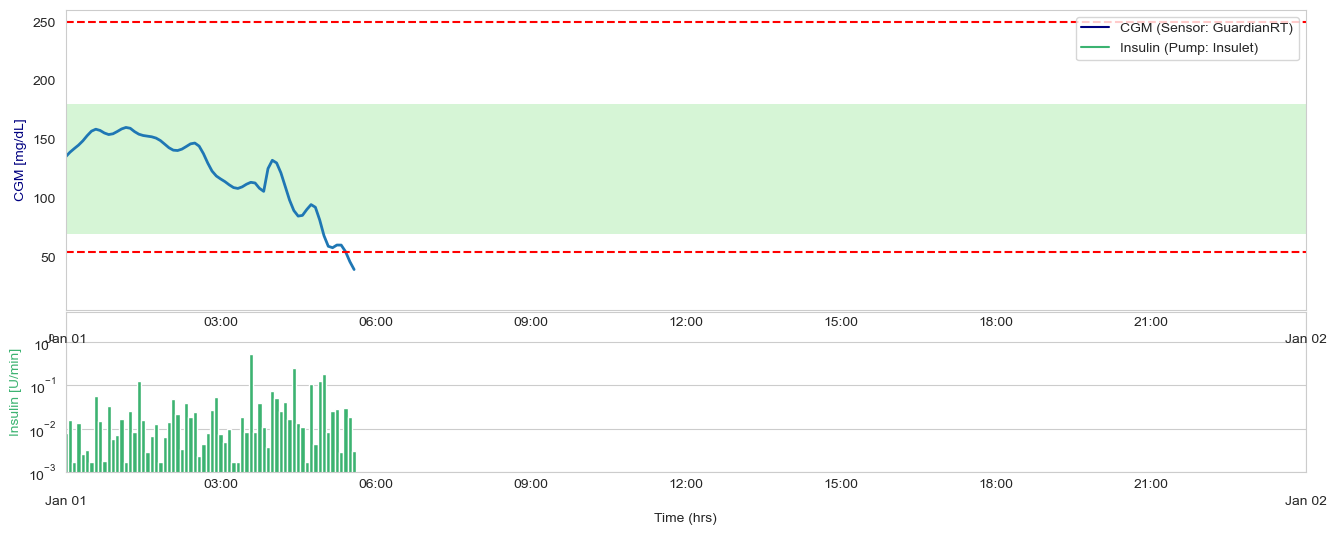

/Users/adema/VSProjects/RL/G2P2C/visualiser/core.py:190: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2018-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'time'] = datetime(2018, 1, day, hour, min, 0)


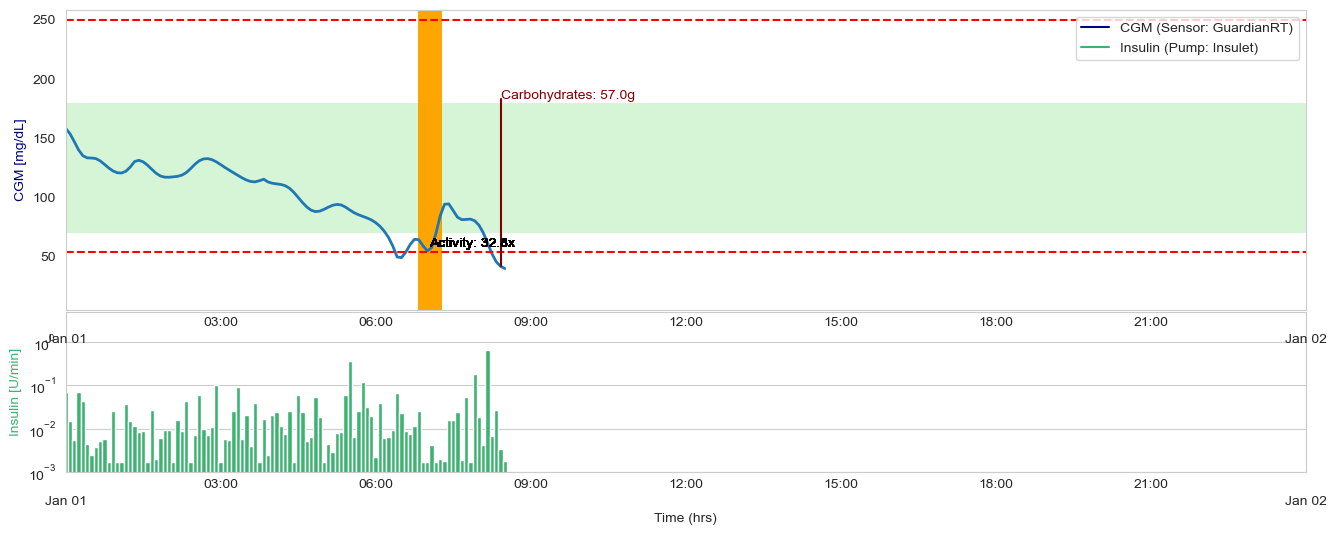

IndexError: list index out of range

In [2]:
## debugging a given experimentset_args
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
# plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=268)
# plot_training_action_summary(target_exp, horizon=256)


# for t in range(0, target_exp.testing_workers):
#      plot_episode(target_exp, tester=t, episode=32)

In [56]:
# stats for the RL agent
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric, sim_len):
    target_metrics = ['normo', 'hypo', 'hyper', 'S_hypo', 'S_hyper', 'lgbi', 'hgbi', 'ri', 'reward']
    failures = res[res['t'] < sim_len].count()['t']
    tot = res.shape[0]
    res = res[res['t'] == sim_len]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = (failures / tot) * 100
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res 

n_trials = 500
subjects = ['0', '1', '3', '4', '5', '6', '7'] #, '2', '8' , '9'
seeds = ['1', '2', '3']
cohort, summary_stats = [], []

for sub in subjects:
    data = []
    for s in seeds:
        FOLDER_PATH='results/'+PATH+sub+'_'+s+'/testing/data'
        for i in range(0, n_trials):
            test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
            df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
            data.append(df)

    res = pd.concat(data)
    res['PatientID'] = sub
    res.rename(columns={'sev_hypo':'S_hypo', 'sev_hyper':'S_hyper'}, inplace=True)
    
    summary_stats.append(res)

    print("\nT1D subject: ", sub)
    print(calc_stats(res, metric=['mean', 'std','min', 'max'], sim_len=288))

    res = calc_stats(res, metric=['mean'], sim_len=288)   # 'min', 'max'
    res['exp'] = sub
    cohort.append(res)
 
print("\nCohort Full Stats")
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)
print(full)
print('sorted')
print(full.sort_values('hgbi'))

print("\nCohort avergaed stats")
r = calc_stats(sum_stats, metric=['mean', 'std','min', 'max'], sim_len=288)
print(r)



T1D subject:  0
      normo  hypo  hyper  S_hypo  S_hyper   lgbi   hgbi     ri  reward  fail
mean  67.40  0.06  31.81    0.00     0.73   0.57   7.34   7.91  268.08   0.2
std   10.37  0.40   9.75    0.11     1.46   0.93   2.07   2.48    6.16   0.2
min   45.83  0.00   9.72    0.00     0.00   0.00   3.53   3.88  255.62   0.2
max   90.28  5.90  52.43    4.17     7.64  10.82  11.34  20.94  279.93   0.2

T1D subject:  1
      normo  hypo  hyper  S_hypo  S_hyper  lgbi  hgbi    ri  reward  fail
mean  80.83  0.07  19.10    0.00     0.01  0.54  4.76  5.30  276.13   0.0
std    5.40  0.38   5.44    0.02     0.12  0.50  0.83  0.89    2.40   0.0
min   60.07  0.00   5.56    0.00     0.00  0.00  2.48  2.88  264.30   0.0
max   94.44  5.90  39.93    0.69     3.12  4.26  8.28  9.03  282.05   0.0

T1D subject:  3
      normo   hypo  hyper  S_hypo  S_hyper  lgbi   hgbi     ri  reward  fail
mean  65.08   3.73  27.30    0.20     3.69  3.17  10.64  13.81  264.33  6.65
std    4.53   3.55   3.21    0.65     2.

In [99]:
def cohort_stats(FOLDER_PATH, control_type='real', individual_stats=False):
    arr = []
    print('Summary stats for {}'.format(control_type))
    manual_control = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    
    
    failures = manual_control[manual_control['survival'] < 312].count()['survival']
    
    #print('Number of Catestrophic failures: {}'.format(failures))

    filered_manual_control = manual_control[manual_control['survival'] == 312]    
    t_cohort = filered_manual_control[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
    #print(manual_control[target_metrics].describe())
    t_cohort['failure'] = failures
    t_cohort['subject'] = 1000
    arr.append(t_cohort)
    
    if individual_stats:
        #print('\n##################Individual Stats#######################')
        for subject_id in range(20, 30):
            print('\nSubject ID: {}'.format(subject_id))
            subject = manual_control.loc[manual_control['PatientID'] == subject_id]
            failures = subject[subject['survival'] < 312].count()['survival']
            
            subject = subject[subject['survival'] == 312]    
            #t_sub = subject[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
            t_sub = subject[target_metrics].describe().loc[['mean']]
            t_sub['failure'] = failures
            t_sub['subject'] = subject_id
            print('Number of Catestrophic failures: {}'.format(failures))
            arr.append(t_sub)
            print(t_sub)


    final = pd.concat(arr)
    final['mode'] = control_type
    #print(final)
    #final.to_csv(control_type+'.csv')
    return final
        
FOLDER_PATH='/results/embc14_real'    
f1 = cohort_stats(FOLDER_PATH, control_type='real', individual_stats=True)

FOLDER_PATH='/results/embc14_quadratic'    
f2 = cohort_stats(FOLDER_PATH, control_type='quadratic', individual_stats=True)
#full = pd.concat([f1, f2])
#print(full)
#full.to_csv('full_results_manual_control.csv')


Summary stats for real

Subject ID: 20
Number of Catestrophic failures: 36
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  69.102764  2.315738  28.054181  0.121356   0.405961  2.384251  7.587342   

            ri  failure  subject  
mean  9.971593       36       20  

Subject ID: 21
Number of Catestrophic failures: 3
          normo     hypo     hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  90.103644  0.25686  9.599311  0.006108   0.034077  0.844296  3.384868   

            ri  failure  subject  
mean  4.229164        3       21  

Subject ID: 22
Number of Catestrophic failures: 55
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  70.826889  2.551214  26.055827  0.181794   0.384276  3.067901  7.419369   

            ri  failure  subject  
mean  10.48727       55       22  

Subject ID: 23
Number of Catestrophic failures: 14
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hg

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

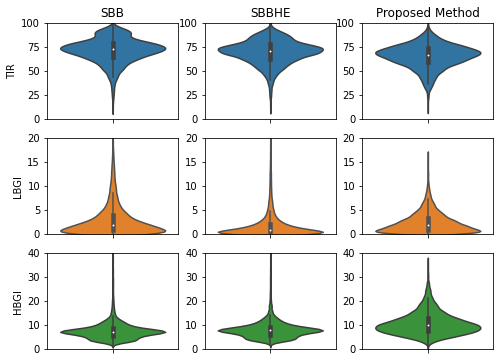

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

In [1]:
# stats for the RL agent

import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric):
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    failures = res[res['t'] < 312].count()['t']
    res = res[res['t'] == 312]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = failures
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res
    
    
# nov22_embc_A1_avg    

n_trials = 100
subjects = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
#subjects = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10']
cohort, summary_stats = [], []
for s in subjects:
    data = []
    # s == 'A3' or s == 'A6' or
    if s == 'A9':
        FOLDER_PATH='/results/dec7_embc_'+s+'_avg/testing/data'
    else:
        FOLDER_PATH='/results/dec3_embc_'+s+'_avg/testing/data'
    
    for i in range(0, n_trials):
        test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
        df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
        data.append(df)
    res = pd.concat(data)
    res['PatientID'] = s
    summary_stats.append(res)
    
    print(s)
    print(calc_stats(res, metric=['mean', 'min', 'max']))
    
    
    res = calc_stats(res, metric=['mean'])   # 'min', 'max'
    
    
    res['exp'] = s
    cohort.append(res)
 
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)
print(full)
full.to_csv('combined.csv')
r = calc_stats(sum_stats, metric=['mean', 'min', 'max'])
print(r)

ModuleNotFoundError: No module named 'decouple'